In [1]:
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from matplotlib import pyplot as plt

# Setting up datasets

In [2]:
# Easily get n-numbers of classes to use labeled correctly
"""
import shutil
import os

num_classes = 50  # Number of kuzushiji kanji folders to bring in.
filename = "50 kanji labeled.txt"  # A txt file with folders labeled with their meaning.
folder1 = "full_dataset"  # Folder where all kanji imgs and labels are.
folder2 = "midterm_dataset"  # Folder to copy the top n classes
# 'utf-8' is needed so Japanese can be inputted
with open(filename, 'r', encoding='utf-8') as f:
    for i in range(num_classes):
        line = f.readline().split(',')
        foldername = line[0][:-1] # Folder name without the '/'
        kanji_meaning = line[3][:-1] # Removes newline character
        src_folder = os.path.join(folder1, foldername)
        dst_folder = os.path.join(folder2, kanji_meaning)
        shutil.copytree(src_folder, dst_folder)
        print(foldername, "copied to:", kanji_meaning)
"""

'\nimport shutil\nimport os\n\nnum_classes = 50  # Number of kuzushiji kanji folders to bring in.\nfilename = "50 kanji labeled.txt"  # A txt file with folders labeled with their meaning.\nfolder1 = "full_dataset"  # Folder where all kanji imgs and labels are.\nfolder2 = "midterm_dataset"  # Folder to copy the top n classes\n# \'utf-8\' is needed so Japanese can be inputted\nwith open(filename, \'r\', encoding=\'utf-8\') as f:\n    for i in range(num_classes):\n        line = f.readline().split(\',\')\n        foldername = line[0][:-1] # Folder name without the \'/\'\n        kanji_meaning = line[3][:-1] # Removes newline character\n        src_folder = os.path.join(folder1, foldername)\n        dst_folder = os.path.join(folder2, kanji_meaning)\n        shutil.copytree(src_folder, dst_folder)\n        print(foldername, "copied to:", kanji_meaning)\n'

In [3]:
# Some starting code from Angel, mine required a 'seed' for training and eval datasets.
# Datasets going to training is roughly 70%.
new_kkanji_midterm_dataset_train = tf.keras.utils.image_dataset_from_directory(
    './midterm_dataset/',
    validation_split=0.3,
    subset="training",
    image_size=(64, 64),
    batch_size=32,
    seed=0)

Found 40857 files belonging to 50 classes.
Using 28600 files for training.


In [4]:
# Datasets going to training is roughly 30%.
new_kkanji_midterm_dataset_val = tf.keras.utils.image_dataset_from_directory(
    './midterm_dataset/',
    validation_split=0.3,
    subset="validation",
    image_size=(64, 64),
    batch_size=32,
    seed=0)

Found 40857 files belonging to 50 classes.
Using 12257 files for validation.


# John's model

In [5]:
john_model = models.Sequential()
# Add a CNN layer with 32 filters, 3x3 kernel, and activation slope of 'relu'.
# Image dimensions will be 64x64.
john_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
# Use 2x2 pool to reduce size.
john_model.add(layers.AveragePooling2D((2, 2)))
john_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
john_model.add(layers.AveragePooling2D((2, 2)))
# Flatten the 2d to 1d layer.
john_model.add(layers.Flatten())
john_model.add(layers.Dense(64, activation='relu'))
# This number is related to the total number of options.
john_model.add(layers.Dense(50))

In [6]:
john_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

In [7]:
john_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                   metrics=['accuracy'])

# Really useful in stopping the training early when no more progress
# is made after a certain amount of epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

john_history = john_model.fit(new_kkanji_midterm_dataset_train, 
                              epochs=15, 
                              callbacks=callback, 
                              validation_data=new_kkanji_midterm_dataset_val)

Epoch 1/15
894/894 [==============================] - 57s 63ms/step - loss: 1.1955 - accuracy: 0.7610 - val_loss: 0.3921 - val_accuracy: 0.8983
Epoch 2/15
894/894 [==============================] - 51s 57ms/step - loss: 0.2354 - accuracy: 0.9387 - val_loss: 0.3451 - val_accuracy: 0.9125
Epoch 3/15
894/894 [==============================] - 52s 58ms/step - loss: 0.1218 - accuracy: 0.9647 - val_loss: 0.3841 - val_accuracy: 0.9173
Epoch 4/15
894/894 [==============================] - 51s 57ms/step - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.4626 - val_accuracy: 0.9076
Epoch 5/15
894/894 [==============================] - 53s 59ms/step - loss: 0.0662 - accuracy: 0.9787 - val_loss: 0.4132 - val_accuracy: 0.9179


## Evaluate John's Model 

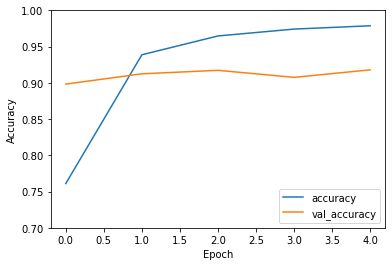

In [12]:
plt.plot(john_history.history['accuracy'], label='accuracy')
plt.plot(john_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')


In [9]:
john_model.save('john_model')

INFO:tensorflow:Assets written to: john_model\assets


INFO:tensorflow:Assets written to: john_model\assets


In [10]:
john_model_load = models.load_model('john_model')

In [11]:
john_model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8